# Neurophysiology data visualization - alternatives à Neuroscope ?

## Importation du viewer - soit comme package python soit comme application

In [1]:
import ephyviewer
import numpy as np
from pathlib import Path

import spikeinterface as si
import spikeinterface.extractors as se

import spikeinterface.preprocessing as spre
import spikeinterface.postprocessing as spost
import spikeinterface.curation as scur
import spikeinterface.widgets as sw
import spikeinterface.qualitymetrics
import os

si.set_global_job_kwargs(n_jobs=-1, progress_bar=True)

## Visualisation d'un enregistrement du nas 5

base_folder = Path("/media/nas7/React_Passive_AG/OBG/Shropshire/freely-moving/20241121_puretones")

In [2]:
base_folder = Path("/home/mickey/download/20241121_puretones")

In [3]:
# conditionnement aversif
recording = se.NeuroScopeRecordingExtractor(
    os.path.join(base_folder, "M4_20241121_Shropshire_FM_puretones.dat")
)

In [4]:
# Objet Python de Classe NeuroScopeRecordingExtractor
recording

NeuroScopeRecordingExtractor: 113 channels - 30.0kHz - 1 segments - 19,223,296 samples 
                              640.78s (10.68 minutes) - int16 dtype - 4.05 GiB
  file_path: /home/mickey/download/20241121_puretones/M4_20241121_Shropshire_FM_puretones.dat

In [5]:
recording.get_channel_groups()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [6]:
channel_sliced_recording = recording.select_channels(
    channel_ids=[str(nb) for nb in range(31, 95)]
)

In [7]:
# Hérite automatiquement des propriétés neuroscope comme les groupes de channel (HPC, OB, bruit...)
channel_sliced_recording.get_num_channels()

64

In [8]:
recording = channel_sliced_recording

In [9]:
recording

ChannelSliceRecording: 64 channels - 30.0kHz - 1 segments - 19,223,296 samples 
                       640.78s (10.68 minutes) - int16 dtype - 2.29 GiB

In [10]:
# ajout dummy probe pour la visualisation
from probeinterface import generate_linear_probe

num_elec = recording.get_num_channels()
probe = generate_linear_probe(
    num_elec=num_elec,
    ypitch=20,
    contact_shapes="circle",
    contact_shape_params={"radius": 6},
)
probe.set_device_channel_indices(np.arange(num_elec))
recording = recording.set_probe(probe)

In [11]:
recording.get_channel_ids()

array(['31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74',
       '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85',
       '86', '87', '88', '89', '90', '91', '92', '93', '94'], dtype='<U2')

In [12]:
recording

ChannelSliceRecording: 64 channels - 30.0kHz - 1 segments - 19,223,296 samples 
                       640.78s (10.68 minutes) - int16 dtype - 2.29 GiB

In [13]:
recording.get_channel_ids()

array(['31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74',
       '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85',
       '86', '87', '88', '89', '90', '91', '92', '93', '94'], dtype='<U2')

In [14]:
import spikeinterface.full as sf

In [15]:
# Sorting fait hier sur chaque groupe indépendant.
sorter_names = ["spykingcircus2"]

In [16]:
from spikeinterface.sorters import installed_sorters, available_sorters

installed_sorters()

['kilosort4',
 'mountainsort5',
 'simple',
 'spykingcircus2',
 'tridesclous',
 'tridesclous2']

In [17]:
from spikeinterface.sorters import Kilosort2_5Sorter, IronClustSorter

In [18]:
Kilosort2_5Sorter.set_kilosort2_5_path("/home/mickey/Documents/Theotime/Kilosort/")

Setting KILOSORT2_5_PATH environment variable for subprocess calls to: /home/mickey/Documents/Theotime/Kilosort


In [19]:
IronClustSorter.set_ironclust_path("/home/mickey/Documents/Theotime/ironclust/")

Setting IRONCLUST_PATH environment variable for subprocess calls to: /home/mickey/Documents/Theotime/ironclust


In [20]:
sf.get_default_sorter_params("kilosort2_5")

{'detect_threshold': 6,
 'projection_threshold': [10, 4],
 'preclust_threshold': 8,
 'whiteningRange': 32.0,
 'momentum': [20.0, 400.0],
 'car': True,
 'minFR': 0.1,
 'minfr_goodchannels': 0.1,
 'nblocks': 5,
 'sig': 20,
 'freq_min': 150,
 'sigmaMask': 30,
 'lam': 10.0,
 'nPCs': 3,
 'ntbuff': 64,
 'nfilt_factor': 4,
 'NT': None,
 'AUCsplit': 0.9,
 'do_correction': True,
 'wave_length': 61,
 'keep_good_only': False,
 'skip_kilosort_preprocessing': False,
 'scaleproc': None,
 'save_rez_to_mat': False,
 'delete_tmp_files': ('matlab_files',),
 'delete_recording_dat': False,
 'n_jobs': -1,
 'chunk_duration': '1s',
 'progress_bar': True,
 'mp_context': None,
 'max_threads_per_process': 1}

In [21]:
sf.get_default_sorter_params("ironclust")

{'detect_sign': -1,
 'adjacency_radius': 50,
 'adjacency_radius_out': 100,
 'detect_threshold': 3.5,
 'prm_template_name': '',
 'freq_min': 300,
 'freq_max': 8000,
 'merge_thresh': 0.985,
 'pc_per_chan': 9,
 'whiten': False,
 'filter_type': 'bandpass',
 'filter_detect_type': 'none',
 'common_ref_type': 'trimmean',
 'batch_sec_drift': 300,
 'step_sec_drift': 20,
 'knn': 30,
 'min_count': 30,
 'fGpu': True,
 'fft_thresh': 8,
 'fft_thresh_low': 0,
 'nSites_whiten': 16,
 'feature_type': 'gpca',
 'delta_cut': 1,
 'post_merge_mode': 1,
 'sort_mode': 1,
 'fParfor': False,
 'filter': True,
 'clip_pre': 0.25,
 'clip_post': 0.75,
 'merge_thresh_cc': 1,
 'nRepeat_merge': 3,
 'merge_overlap_thresh': 0.95,
 'version': 2,
 'n_jobs': -1,
 'chunk_duration': '1s',
 'progress_bar': True,
 'mp_context': None,
 'max_threads_per_process': 1}

In [22]:
recording

ChannelSliceRecording: 64 channels - 30.0kHz - 1 segments - 19,223,296 samples 
                       640.78s (10.68 minutes) - int16 dtype - 2.29 GiB

In [23]:
import spikeinterface.sorters as ss

In [28]:
sortings

{'spykingcircus2': NumpyFolder: 82 units - 1 segments - 30.0kHz}

spykingcircus2


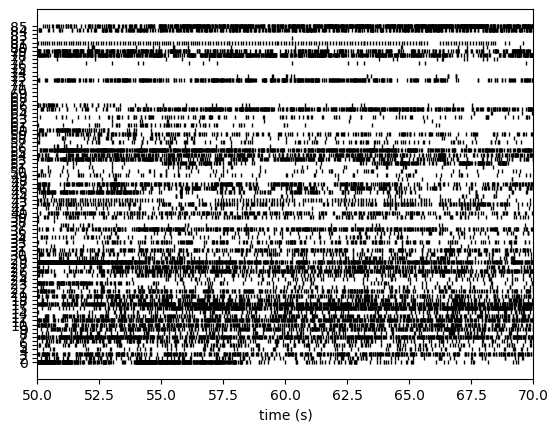

In [29]:
for sorter_name, sort in sortings.items():
    print(sorter_name)
    sf.plot_rasters(sort, time_range=(50.0, 70.0))

In [30]:
import spikeinterface.comparison as sc

In [31]:
sorter_names

['spykingcircus2']

In [32]:
list(sortings.values())

[NumpyFolder: 82 units - 1 segments - 30.0kHz]

multi_comp = sc.compare_multiple_sorters(list(sortings.values()), sorter_names)
sw.plot_multicomparison_agreement(multi_comp)
sw.plot_multicomparison_agreement_by_sorter(multi_comp)

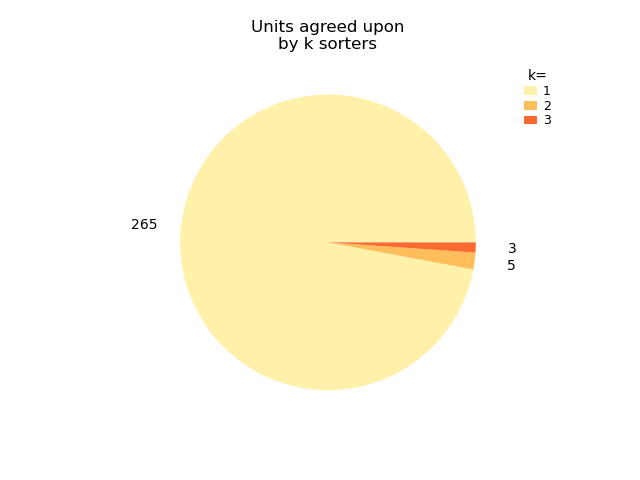

In [45]:
sw.plot_multicomparison_agreement(multi_comp)

In [ ]:
better_multi_comp = sc.compare_multiple_sorters(
    list(sortings.values()), ["kilosort4", "spykingcircus2", "klustakwik"]
)

In [50]:
multi_comp.get_agreement_sorting()

AgreementSortingExtractor: 273 units - 1 segments - 20.0kHz

In [34]:
already = False
try:
    analyzer = (
        si.load_sorting_analyzer(
            folder=os.path.join(base_folder, "klustakwik_analyzer"),
            load_extensions=True,
        ),
    )
    already = True
except Exception as e:
    analyzer = si.create_sorting_analyzer(sortings["spykingcircus2"], recording)

print(already)

estimate_sparsity:   0%|          | 0/641 [00:00<?, ?it/s]

False


In [ ]:
required_extensions = [
    "random_spikes",
    "waveforms",
    "templates",
    "noise_levels",
    "unit_locations",
    "template_similarity",
    "spike_amplitudes",
    "correlograms",
]
analyzer.compute(required_extensions)
analyzer

compute_waveforms:   0%|          | 0/641 [00:00<?, ?it/s]

noise_level:   0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
num_spikes = sortings["spykingcircus"].count_num_spikes_per_unit()
unit_amplitudes = si.get_template_extremum_amplitude(analyzer)

analyzer.sorting.set_property("num_spikes", list(num_spikes.values()))
analyzer.sorting.set_property("amplitude", list(unit_amplitudes.values()))

In [37]:
analyzer_saved = analyzer.save_as(
    folder=os.path.join(base_folder, "klustakwik_analyzer2"), format="zarr"
)

In [38]:
analyzer_saved.compute(
    "principal_components", n_components=3, mode="by_channel_global", save=True
)
analyzer_saved.compute(
    "quality_metrics",
    metric_names=["snr", "amplitude_cutoff", "rp_violation"],
    save=True,
)
analyzer_saved

Fitting PCA:   0%|          | 0/57 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/57 [00:00<?, ?it/s]

/home/mickey/Documents/Theotime/spikeinterface/src/spikeinterface/qualitymetrics/quality_metric_calculator.py:206: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  metrics.loc[non_empty_unit_ids, col] = pd.Series(res[i])


SortingAnalyzer: 68 channels - 57 units - 1 segments - zarr - sparse - has recording
Loaded 10 extensions: random_spikes, waveforms, templates, noise_levels, unit_locations, template_similarity, correlograms, spike_amplitudes, principal_components, quality_metrics

In [39]:
w = sw.plot_sorting_summary(
    analyzer_saved,
    unit_table_properties=["num_spikes", "amplitude"],
    curation=True,
    label_choices=["noise", "MUA", "SUA"],
    backend="sortingview",
)

https://figurl.org/f?v=npm://@fi-sci/figurl-sortingview@12/dist&d=sha1://325b2d1fe74dcc77ec1b924806401b76c997ddff


In [40]:
%gui qt
w = sw.plot_sorting_summary(
    analyzer_saved,
    unit_table_properties=["num_spikes", "amplitude"],
    label_choices=["noise", "MUA", "SUA"],
    backend="spikeinterface_gui",
)

qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member function of a QObject subclass
qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member function of a QObject subclass
qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member function of a QObject subclass
qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member function of a QObject subclass
qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member function of a QObject subclass
qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member function of a QObject subclass
qt.core.qobject.connect: QObject::connect(QStyleHints, QStyleHints): unique connections require a pointer to member fu

Seems to be implemented: visualize the video and/or position live in ephyviewer.

# Pynapple: a python tsd package

A regarder plus en détail, a l'air d'être un portage de Tsd + fonctions de lazy loading, tuning curves, signal viewer...

Surtout un wrapper numpy ?

# NeuroPy: a package managed by Diba lab

# OpenEphys

In [ ]:
from open_ephys.analysis import Session

directory = "/media/nas7/React_Passive_AG/OBG/Edel/Recordings/13052022/Edel_2022-05-13_09-09-55_m/Record_Node_101/experiment1/PostExp/continuous/Rhythm_FPGA-100.0"

import pyopenephys

file = pyopenephys.File(directory + "/continuous.dat")

need to change all our structure

## Neuropy

Not maintained anymore.